# Notebook to analyze brightness from training videos

In [2]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

import datajoint as dj
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.patches as mpatches
from os.path import exists
import cv2

from matplotlib import cm
from u19_pipeline import utility as uti


Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [4]:
dj.conn()
drive_videos = '/u19_dj'
root_path = uti.get_network_path(drive_videos)

## Databases to connect

In [5]:
behavior = dj.create_virtual_module('behavior', 'u19_behavior')

## Get all sessions with video

In [6]:
trials_video = pd.DataFrame((behavior.TowersBlockTrialVideo).fetch('KEY', as_dict=True))
trials_video.head()

blocks_video = trials_video.drop_duplicates(subset=['subject_fullname', 'session_date', 'session_number', 'block'])
blocks_video = blocks_video.drop(['trial_idx'], axis=1)
blocks_video = blocks_video.reset_index(drop=True)
blocks_video.head()

,subject_fullname,session_date,session_number,block
0,efonseca_jj014,2020-12-14,0,1
1,efonseca_jj014,2020-12-14,0,2
2,efonseca_jj014,2020-12-14,0,3
3,efonseca_jj014,2020-12-14,0,4
4,efonseca_jj016,2021-02-28,0,2
...,...,...,...,...
85,sbolkan_d1_1293,2020-12-30,0,2
86,sbolkan_d2_402,2020-12-29,0,1
87,testuser_T01,2021-07-09,0,1
88,testuser_T01,2021-07-12,0,1


## Get videos for each session

In [19]:
cols_trials = ['subject_fullname', 'session_date', 'session_number', 'block', 'trial_idx', 'cue_presence_left', 'cue_presence_right', 'cue_onset_left', 'cue_onset_right', 'video_path']
order_by=('block', 'trial_idx')

for i in range(1):

    key_dict = blocks_video.loc[i+10, :].to_dict()
    video_df = pd.DataFrame(((behavior.TowersBlockTrialVideo * behavior.TowersBlock.Trial) & key_dict).fetch(*cols_trials, as_dict=True, order_by=order_by))


    for j in range(1):
        path_video = video_df.loc[j, 'video_path']
        path_video = path_video.replace(drive_videos, root_path)
        print(path_video)

        # Create a VideoCapture object and read from input file
        # If the input is the camera, pass 0 instead of the video file name
        cap = cv2.VideoCapture(path_video)

        # Check if camera opened successfully
        if (cap.isOpened()== False): 
            print("Error opening video stream or file")

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        mean_value = np.zeros((total_frames))
        for k in range(total_frames):
        
            # Capture frame-by-frame
            ret, frame = cap.read()
            if ret == True:
                mean_value[k] = np.mean(frame.flatten())


    cap.release()



/mnt/cup/u19_dj/external_files/u19_behavior/TowersBlockTrialVideo/emanuele/emanuele_B14972/20160310_S0/B2/emanuele_B14972_20160310_S0-B2-T1.mp4


### Create label and color patches for plot

In [14]:
video_df.head()


,subject_fullname,session_date,session_number,block,trial_idx,video_path,cue_presence_left,cue_presence_right,cue_onset_left,cue_onset_right
0,emanuele_B14972,2016-03-10,0,2,1,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False]]","[[True, True, True, True, True, True]]",None,"[[70, 179, 301, 370, 449, 481]]"
1,emanuele_B14972,2016-03-10,0,2,2,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[True, True, True]]","[[False, False, False]]","[[70, 282, 372]]",None
2,emanuele_B14972,2016-03-10,0,2,3,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[90, 126, 203, 244, 265, 293, 314, 340, 370, ..."
3,emanuele_B14972,2016-03-10,0,2,4,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False]]","[[True, True, True, True, True, True]]",None,"[[141, 181, 204, 296, 352, 380]]"
4,emanuele_B14972,2016-03-10,0,2,5,/u19_dj/external_files/u19_behavior/TowersBloc...,"[[False, False, False, False, False, False, Fa...","[[True, True, True, True, True, True, True, Tr...",None,"[[73, 96, 129, 215, 272, 310, 341, 378]]"


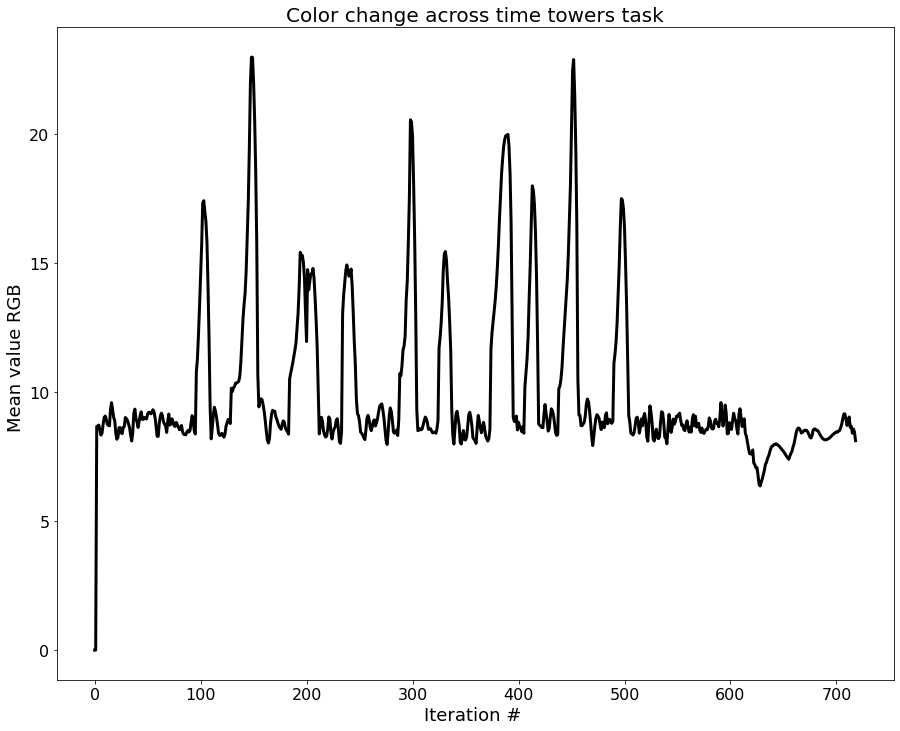

In [20]:
 
fig, axs = plt.subplots(1, 1, figsize=(15,12))

plt.plot(mean_value, linewidth=3, color ='k')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Iteration # ", fontsize=18)
plt.ylabel("Mean value RGB ", fontsize=18);
plt.title('Color change across time towers task', fontsize=20);


In [21]:
mean_value.shape

(719,)

In [17]:
sana = np.where(mean_value > 14)

In [18]:
sana

(array([ 75,  76,  77,  78,  79, 213, 214, 215, 216, 217, 218, 219, 238,
        239, 240, 241, 242, 243, 244, 245, 276, 277, 278, 279, 280, 302,
        303, 304, 305, 306, 307, 365, 366, 367, 368, 369, 370, 455, 456,
        457, 458, 459, 460, 461, 462, 463, 464, 465]),)